### This script generates web traffic data for our hypothetical web startup "MLASS" in chapter 01

## Step1: Import Packages

#### We shouldn't do the following, becuas we do not want to pollute our namespace:

In [1]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Step2: Reading in the data

#### Using SciPy's genfromtxt()

In [2]:
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")

## Step3: Preprocessing and cleaning the data

#### Separate the dimensions into two vectors x and y

In [3]:
x = data[:,0]
y = data[:,1]

#### Removing some values in y that contain invalid values, nan.

In [4]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

#### Get a first impression of our data

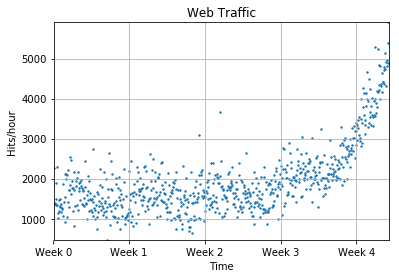

In [5]:
plt.scatter(x,y,s=2)
plt.title("Web Traffic")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['Week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

#### We can see that while in the first weeks the traffic stayed more or less the same, the last week shows a steep increase

## Step4: Choosing the right model and learning algorithm

#### - Find the real model behind the noisy data points

#### - Use the model to extrapolate into the future to find the point in time where our infrastructure has to be extended

In [6]:
def simpleModel(xx, yy, ord):
    return sp.poly1d(sp.polyfit(xx,yy,ord))

def error(f, xx, yy):
    return sp.sum((f(xx)-yy)**2)

#### Starting with a simple straight line, towards some advanced stuff (polynomial of degree "2, 3, 10 and 100")

In [7]:
errs = []
f1 = simpleModel(x, y, 1)
errs.append(error(f1, x, y))
print("error for f1 %i" %errs[0])

f2 = simpleModel(x, y, 2)
errs.append(error(f2, x, y))
print("error for f2 %i" %errs[1])

f3 = simpleModel(x, y, 3)
errs.append(error(f3, x, y))
print("error for f3 %i" %errs[2])

f10 = simpleModel(x, y, 10)
errs.append(error(f10, x, y))
print("error for f10 %i" %errs[3])

f100 = simpleModel(x, y, 100)
errs.append(error(f100, x, y))
print("error for f100 %i" %errs[4])

error for f1 317389767
error for f2 179983507
error for f3 139350144
error for f10 121942326
error for f100 109452402


C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


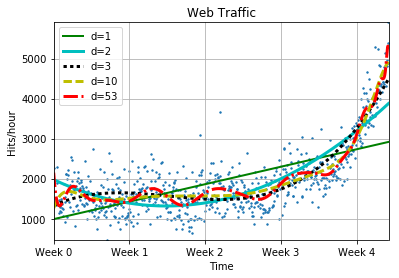

In [8]:
plt.scatter(x,y,s=2)
plt.title("Web Traffic")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['Week %i' %w for w in range(10)])

# Simple Model 1
fx = sp.linspace(0, x[-1], 10000)
plt.plot(fx, f1(fx), 'g', linewidth=2)

# Simple Model 2
fx = sp.linspace(0, x[-1], 10000)
plt.plot(fx, f2(fx),'c', linewidth=3)

# Simple Model 3
fx = sp.linspace(0, x[-1], 10000)
plt.plot(fx, f3(fx),'k:', linewidth=3)

# Simple Model 4
fx = sp.linspace(0, x[-1], 10000)
plt.plot(fx, f10(fx),'y--', linewidth=3)

# Simple Model 5
fx = sp.linspace(0, x[-1], 10000)
plt.plot(fx, f100(fx),'r-.', linewidth=3)

plt.legend(["d=%i" %f1.order, "d=%i" %f2.order, "d=%i" %f3.order, "d=%i" %f10.order, "d=%i" %f100.order], 
           loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

#### For degree 10 and 100 it seems that the models are fitted too much to the data. So much that it is now capturing not only the 
#### underlying process but also the noise. This is called overfitting.

##### The first-order model clearly is too simple, and the models
#### Only the second- and third-order models seem to somehow match the data.
#### However, if we extrapolate them at both borders, we see them going berserk.

#### Switching to a more complex class of models also seems to be the wrong way to go about it.
#### What arguments would back which class? At this point, we realize that we probably
#### have not completely understood our data.

## Stepping back to go forward – another look at our data

#### we step back and take another look at the data. It seems that there is an inflection
#### point between weeks 3 and 4. So let us separate the data and train two lines using
#### week 3.5 as a separation point. We train the first line with the data up to week 3, and
#### the second line with the remaining data.

In [9]:
inflection = 3.5*7*24

xa = x[:inflection] 
ya = y[:inflection]

xb = x[inflection:]
yb = y[inflection:]

C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
fa = simpleModel(xa, ya, 1)
er1 = error(fa, xa, ya)

fb = simpleModel(xb, yb, 1)
er2 = error(fb, xb, yb)

errs.append(er1+er2)

### Plotting the two models for the two data ranges gives the following chart:

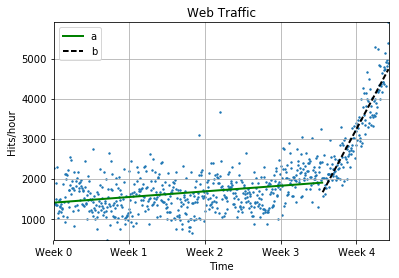

In [11]:
plt.scatter(x,y,s=2)
plt.title("Web Traffic")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['Week %i' %w for w in range(10)])

# Simple Model 6
fx = sp.linspace(xa[0], xa[-1], 10000)
plt.plot(fx, fa(fx), 'g', linewidth=2)
fx = sp.linspace(xb[0], xb[-1], 10000)
plt.plot(fx, fb(fx), 'k--', linewidth=2)

plt.legend(["a", "b"], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

### The following chart describes the error related  to each model

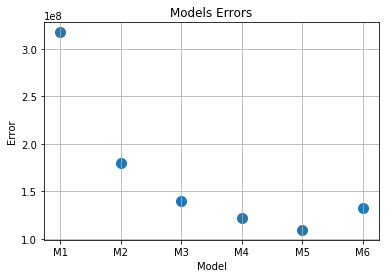

In [12]:
plt.scatter(range(len(errs)), errs, s=100)
plt.title("Models Errors")
plt.xlabel("Model")
plt.ylabel("Error")
plt.xticks([t for t in range(len(errs))], ["M%i" %num for num in range(1,7)])

plt.grid(True)
plt.show()

#### Clearly, the combination of the two lines seems to be a much better fit to the data
#### than anything we have modeled before. But still, the combined error is higher than
#### the higher-order polynomials.

### We can realize that the last week says more about the future than the data before.
#### So let us play fair to the models of degree 2 and above and try out how they behave if we fit them only to the data of the last week.

In [13]:
errs2 = []
fb1 = simpleModel(xb, yb, 1)
errs2.append(error(fb1, xb, yb))
print("error for fb1 %i" %errs2[0])

fb2 = simpleModel(xb, yb, 2)
errs2.append(error(fb2, xb, yb))
print("error for fb2 %i" %errs2[1])

fb3 = simpleModel(xb, yb, 3)
errs2.append(error(fb3, xb, yb))
print("error for fb3 %i" %errs2[2])

fb10 = simpleModel(xb, yb, 10)
errs2.append(error(fb10, xb, yb))
print("error for fb10 %i" %errs2[3])

fb100 = simpleModel(xb, yb, 100)
errs2.append(error(fb100, xb, yb))
print("error for fb100 %i" %errs2[4])

error for fb1 22143941
error for fb2 19768846
error for fb3 19766452
error for fb10 18949296
error for fb100 18300791


C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


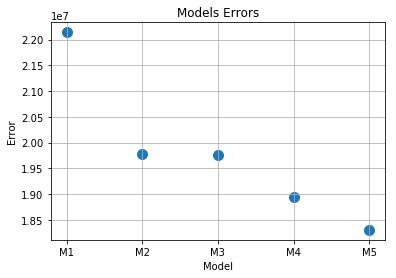

In [14]:
plt.scatter(range(len(errs2)), errs2, s=100)
plt.title("Models Errors")
plt.xlabel("Model")
plt.ylabel("Error")
plt.xticks([t for t in range(len(errs2))], ["M%i" %num for num in range(1,6)])

plt.grid(True)
plt.show()

#### Still, judging from the errors of the models when trained only on the data from week
#### 3.5 and after, we should still choose the most complex one :/

## Training and testing

#### Although we cannot look into the future, we can and should simulate a similar effect
#### by holding out a part of our data.

In [15]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = simpleModel(xb[train], yb[train], 1)
fbt2 = simpleModel(xb[train], yb[train], 2)
fbt3 = simpleModel(xb[train], yb[train], 3)
fbt10 = simpleModel(xb[train], yb[train], 10)
fbt100 = simpleModel(xb[train], yb[train], 100)

C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Amal\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [16]:
errs3 = []
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    errs3.append(error(f, xb[test], yb[test]))
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Error d=1: 7934986.802527
Error d=2: 6585272.639371
Error d=3: 6770635.372978
Error d=10: 9005408.750228
Error d=53: 8669834.940745


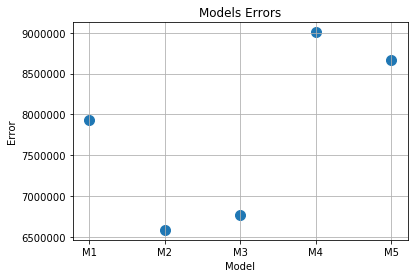

In [17]:
plt.scatter(range(len(errs3)), errs3, s=100)
plt.title("Models Errors")
plt.xlabel("Model")
plt.ylabel("Error")
plt.xticks([t for t in range(len(errs3))], ["M%i" %num for num in range(1,6)])

plt.grid(True)
plt.show()

#### The test errors for the models trained only on the time after the inflection point now
#### show a completely different picture!

#### It seems we finally have a clear winner. The model with degree 2 has the lowest
#### test error, which is the error when measured using data that the model did not see
#### during training. And this is what lets us trust that we won't get bad surprises when
#### future data arrives.

## Answering our initial question

#### We have to calculate when our model function reaches the value 100,000.

In [21]:
reached_max = fsolve(fbt2-100000, 800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 10.887682


#### Of course, there is a certain uncertainty involved with our prediction. To get the real
#### picture, you can draw in more sophisticated statistics to find out about the variance
#### that we have to expect when looking farther and further into the future.

### the most important thing is that as a typical machine learning operator, you will spend most of your time understanding and refining the data